In [1]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()

In [2]:
import sklearn.model_selection
train_X, test_X, train_Y, test_Y = sklearn.model_selection.train_test_split(iris.data, iris.target, test_size=0.5)

In [3]:
import sklearn.tree
dt = sklearn.tree.DecisionTreeClassifier(max_depth=3)
dt = dt.fit(train_X, train_Y)

In [4]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
sklearn.tree.export_graphviz(dt, out_file=dot_data, # if you save a permanent file out_file="dot_file_path"
                             feature_names=iris.feature_names,
                             class_names=iris.target_names,
                             filled=True, # Fill nodes with a color
                             rounded=True) # Round coners of nodes

In [5]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

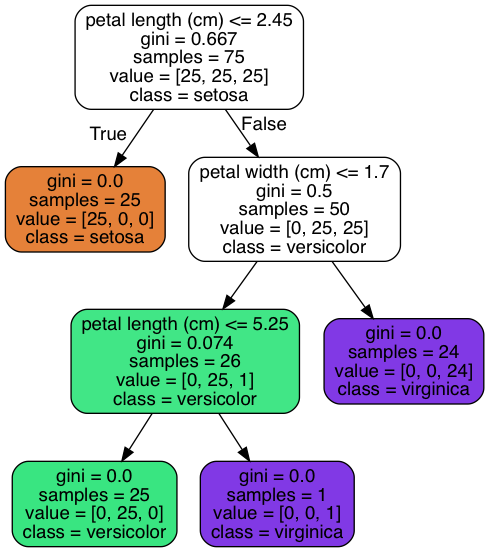

In [6]:
from IPython.display import Image
Image(graph.create_png())

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(test_Y, dt.predict(test_X))

0.94666666666666666

In [8]:
import sklearn.ensemble
rf = sklearn.ensemble.RandomForestClassifier(
    n_estimators=2,
    # max_features=None, # Same as TreeBagging
    # bootstrap=False, # Not use bootstrap sampling
    max_depth=3)
rf = rf.fit(train_X, train_Y)

In [9]:
def convert_graph_from_tree(tree):
    dot_data = StringIO()
    sklearn.tree.export_graphviz(tree, out_file=dot_data,
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names,
                                 filled=True,
                                 rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [10]:
from see import see
see(rf)

    []                     <                      <=                     ==
    !=                     >                      >=                     dir()
    hash()                 help()                 iter()                 len()
    repr()                 str()                  .apply()
    .base_estimator        .base_estimator_       .bootstrap
    .class_weight          .classes_              .criterion
    .decision_path()       .estimator_params      .estimators_
    .feature_importances_                         .fit()
    .get_params()          .max_depth             .max_features
    .max_leaf_nodes        .min_impurity_decrease
    .min_impurity_split    .min_samples_leaf      .min_samples_split
    .min_weight_fraction_leaf                     .n_classes_
    .n_estimators          .n_features_           .n_jobs
    .n_outputs_            .oob_score             .predict()
    .predict_log_proba()                          .predict_proba()
    .random_state          .score(

In [11]:
graphes = [convert_graph_from_tree(tree) for tree in rf.estimators_]

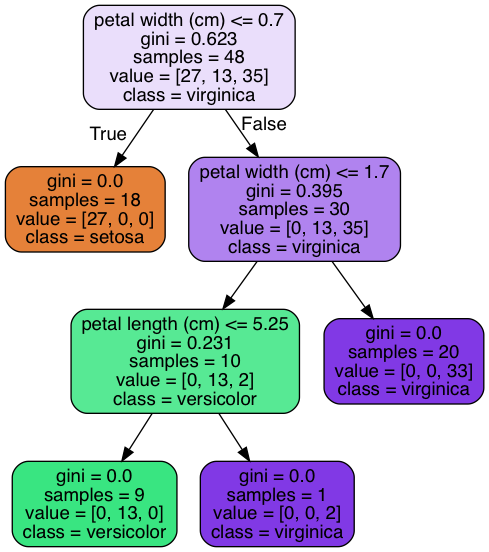

In [12]:
Image(graphes[0].create_png())

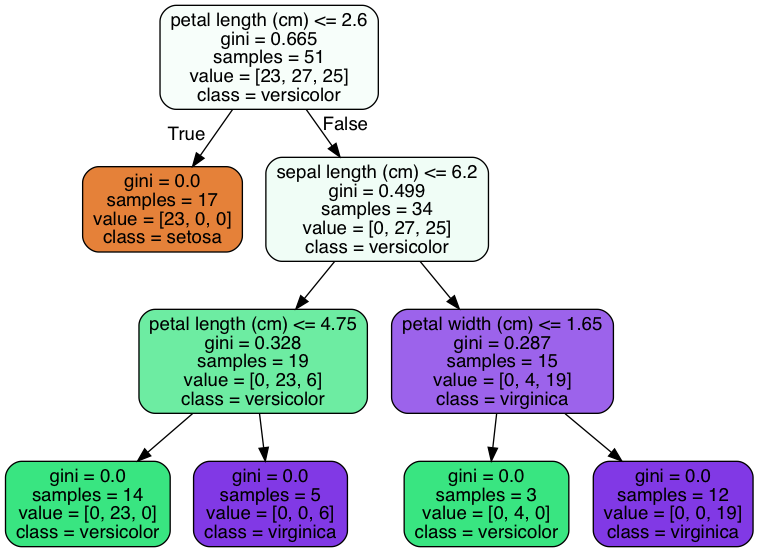

In [13]:
Image(graphes[1].create_png())

In [14]:
accuracy_score(test_Y, rf.predict(test_X))

0.93333333333333335